# Libs

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


## Load Data

In [5]:
# Load the raw data from a CSV file
raw_data = pd.read_csv('CrimeData.csv',sep=';')

In [6]:
raw_data.head(5)

,CaseID,DateOccured,AreaCode,Area,CrimeCode,CrimeDescription,VictimAge,VictimSex,VictimDescentCode,VictimDescent,PremisCode,PremisDescription,WeaponCode,Weapon,CaseStatusCode,CaseStatusDescription,latitude,longitude
0,191501505,2020-01-01,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,White,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,UNKNOWN,IC,Invest Cont,34.1685,-118.4019
1,191921269,2020-01-01,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,Unknown,409,BEAUTY SUPPLY STORE,0,UNKNOWN,IC,Invest Cont,34.2198,-118.4468
2,200100501,2020-01-01,1,Central,121,"RAPE, FORCIBLE",25,F,H,Hispanic-Latin-Mexican,735,NIGHT CLUB (OPEN EVENINGS ONLY),500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534
3,200100502,2020-01-02,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,H,Hispanic-Latin-Mexican,404,DEPARTMENT STORE,0,UNKNOWN,IC,Invest Cont,34.0483,-118.2631
4,200100504,2020-01-04,1,Central,946,OTHER MISCELLANEOUS CRIME,0,X,X,Unknown,726,POLICE FACILITY,0,UNKNOWN,IC,Invest Cont,34.0448,-118.2474


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246416 entries, 0 to 246415
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CaseID                 246416 non-null  int64  
 1   DateOccured            246416 non-null  object 
 2   AreaCode               246416 non-null  int64  
 3   Area                   246416 non-null  object 
 4   CrimeCode              246416 non-null  int64  
 5   CrimeDescription       246416 non-null  object 
 6   VictimAge              246416 non-null  int64  
 7   VictimSex              246416 non-null  object 
 8   VictimDescentCode      246416 non-null  object 
 9   VictimDescent          246416 non-null  object 
 10  PremisCode             246416 non-null  int64  
 11  PremisDescription      246251 non-null  object 
 12  WeaponCode             246416 non-null  int64  
 13  Weapon                 246416 non-null  object 
 14  CaseStatusCode         246416 non-nu

## Area Code

A distribution of the different area codes in the dataset.

In [20]:
raw_data['AreaCode'].nunique()

21

In [13]:
raw_data['AreaCode'].unique()

array([15, 19,  1,  9, 10,  7,  2,  3,  4,  8, 16,  6, 20,  5, 12, 18, 14,
       21, 17, 11, 13])

In [12]:
raw_data['AreaCode'].value_counts()

AreaCode
1     16951
12    15592
3     14019
14    13352
20    12992
18    12695
6     12578
7     12326
13    12169
2     11818
8     11554
15    11553
10    10710
11    10596
21    10504
9     10221
19    10031
5      9773
17     9773
4      8760
16     8449
Name: count, dtype: int64

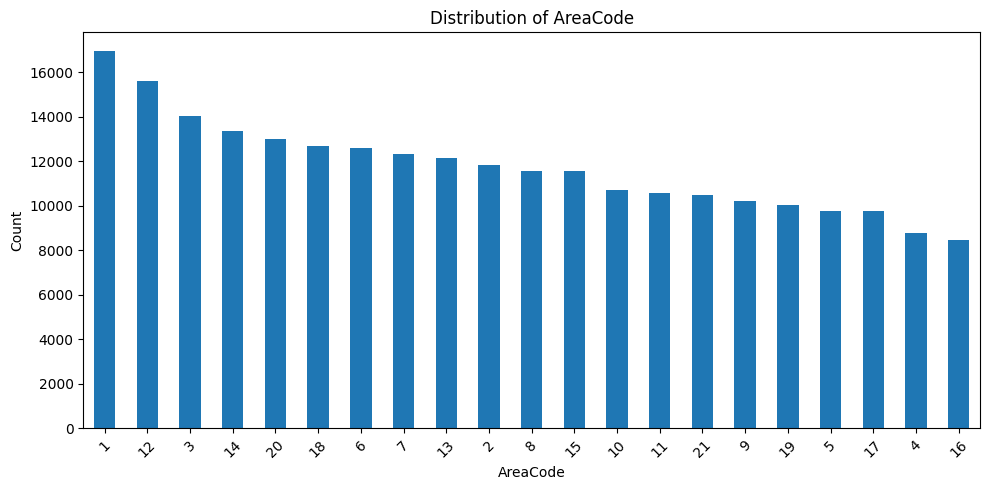

In [32]:
# Value counts
counts = raw_data['AreaCode'].value_counts()

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of AreaCode")
plt.xlabel("AreaCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crime Code

A distribution of the different crime codes in the dataset.

In [19]:
raw_data['CrimeCode'].nunique()

134

In [17]:
raw_data['CrimeCode'].unique()

array([745, 740, 121, 442, 946, 341, 330, 930, 354, 761, 845, 350, 626,
       310, 860, 230, 236, 623, 440, 624, 210, 888, 420, 421, 647, 940,
       480, 810, 662, 220, 649, 901, 815, 900, 890, 956, 755, 753, 331,
       812, 886, 666, 850, 410, 320, 510, 625, 928, 932, 903, 250, 343,
       813, 664, 251, 668, 110, 433, 437, 821, 443, 910, 922, 627, 921,
       235, 352, 648, 822, 902, 441, 762, 661, 820, 651, 237, 520, 920,
       231, 654, 943, 439, 805, 763, 122, 351, 434, 933, 806, 438, 951,
       950, 954, 670, 622, 840, 522, 353, 949, 450, 814, 660, 904, 445,
       653, 473, 471, 436, 347, 345, 931, 760, 435, 944, 756, 880, 870,
       470, 444, 882, 446, 474, 652, 452, 865, 475, 485, 451, 113, 830,
       948, 924, 942, 432])

In [11]:
raw_data['CrimeCode'].value_counts()

CrimeCode
354    26647
624    21760
740    16554
330    16355
310    16256
       ...  
485        2
113        2
942        2
948        1
432        1
Name: count, Length: 134, dtype: int64

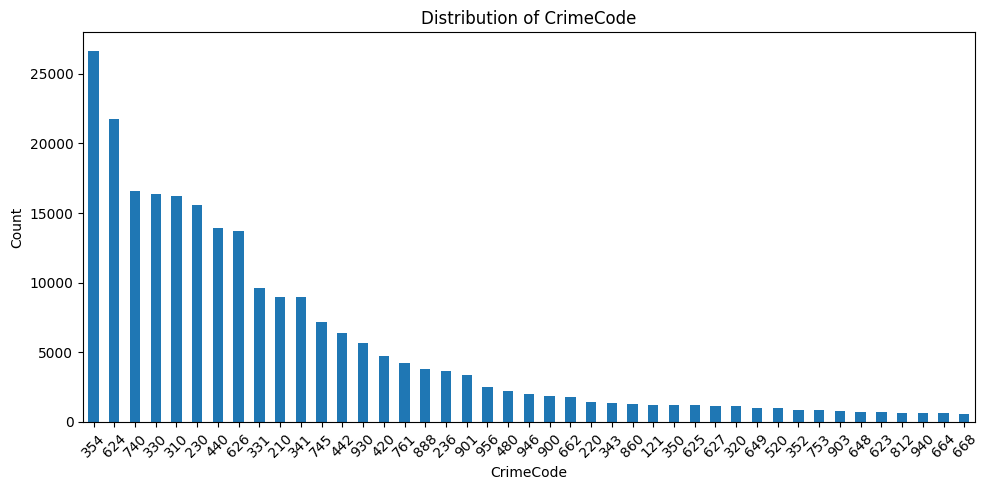

In [43]:
# Value counts
counts = raw_data['CrimeCode'].value_counts()

# keep only values with count > 500
counts = counts[counts > 500]

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of CrimeCode")
plt.xlabel("CrimeCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Premis Code

A distribution of the different premises in the dataset.

In [21]:
raw_data['PremisCode'].nunique()

298

In [22]:
raw_data['PremisCode'].unique()

array([502, 409, 735, 404, 726, 101, 108, 503, 252, 507, 203, 122, 102,
       900, 501, 902, 210, 403, 517, 707, 834, 123, 753, 710, 248, 405,
       602, 801, 118, 719, 903, 202, 244, 744, 701, 733, 406, 738, 741,
       725, 516, 402, 155, 119, 116, 103, 109, 221, 723, 104, 504, 110,
       121, 117, 702, 705, 908, 505, 301, 242, 510, 201, 218, 704, 158,
       256, 751, 217, 727, 509, 124, 722, 255, 804, 222, 120, 401, 717,
       750, 232, 145, 233, 243, 605, 410, 518, 212, 129, 213, 721, 506,
       870, 211, 519, 412, 515, 958, 911, 247, 207, 140, 720, 909, 716,
       251, 511, 408, 968, 835, 946, 514, 708, 220, 906, 904, 146, 231,
       219, 803, 802, 754, 901, 715, 235, 135, 114, 603, 142, 954, 416,
       752, 950, 810, 106, 418, 111, 740, 206, 932, 730, 216, 947, 508,
       897, 415, 254, 966, 729, 107, 512, 910, 736, 229, 205, 147, 127,
       149, 208, 931, 917, 152, 944, 921, 249, 714, 948, 215, 154, 809,
       915, 713, 728, 877, 413, 936, 407, 905, 712, 417, 913, 14

In [23]:
raw_data['PremisCode'].value_counts()

PremisCode
501    51387
101    41422
502    36571
108    14096
203    12165
       ...  
873        1
143        1
976        1
894        1
305        1
Name: count, Length: 298, dtype: int64

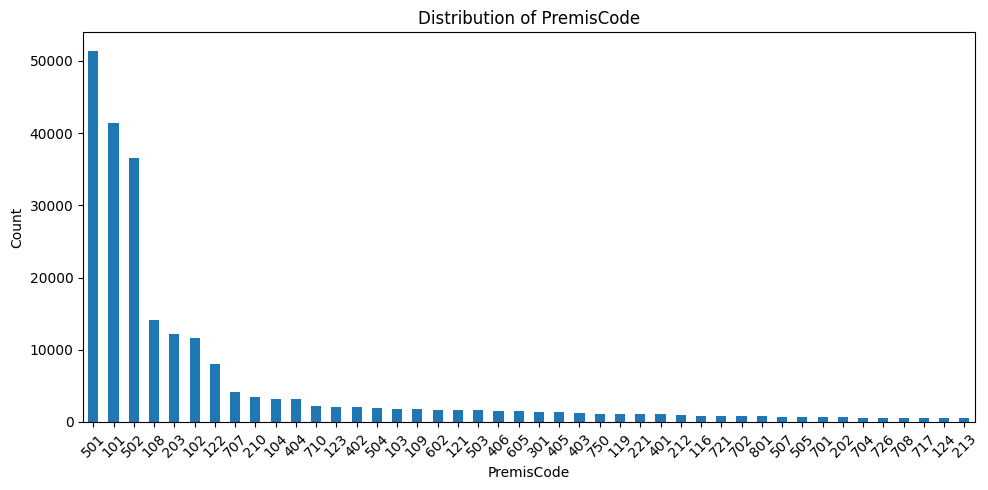

In [41]:
# Value counts
counts = raw_data['PremisCode'].value_counts()

# keep only values with count > 500
counts = counts[counts > 500]

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of PremisCode")
plt.xlabel("PremisCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weapon Code

A distribution of the different weapon codes in the dataset.

In [24]:
raw_data['WeaponCode'].nunique()

77

In [25]:
raw_data['WeaponCode'].unique()

array([  0, 500, 306, 511, 109, 400, 218, 207, 215, 216, 104, 200, 106,
       102, 501, 304, 107, 204, 211, 213, 101, 512, 302, 201, 515, 205,
       312, 203, 308, 311, 219, 212, 114, 307, 221, 310, 113, 506, 115,
       223, 301, 305, 514, 303, 503, 509, 121, 103, 513, 112, 502, 505,
       309, 111, 507, 208, 214, 206, 209, 516, 105, 510, 217, 300, 504,
       118, 110, 202, 108, 122, 210, 116, 220, 119, 117, 508, 125])

In [26]:
raw_data['WeaponCode'].value_counts()

WeaponCode
0      151252
400     51165
500     10049
511      7103
102      5868
        ...  
118         2
117         2
121         1
119         1
508         1
Name: count, Length: 77, dtype: int64

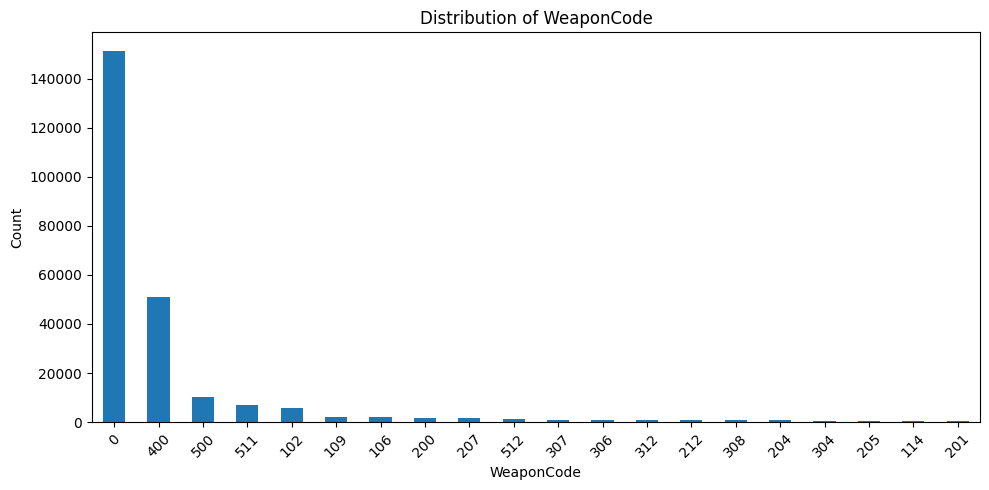

In [42]:
# Value counts
counts = raw_data['WeaponCode'].value_counts()

# keep only values with count > 500
counts = counts[counts > 500]

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of WeaponCode")
plt.xlabel("WeaponCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Case Status Code

A distribution of the different case status codes in the dataset.

In [27]:
raw_data['CaseStatusCode'].nunique()

6

In [28]:
raw_data['CaseStatusCode'].unique()

array(['IC', 'AA', 'AO', 'JO', 'JA', 'CC'], dtype=object)

In [29]:
raw_data['CaseStatusCode'].value_counts()

CaseStatusCode
IC    193154
AO     29240
AA     22689
JA       841
JO       490
CC         2
Name: count, dtype: int64

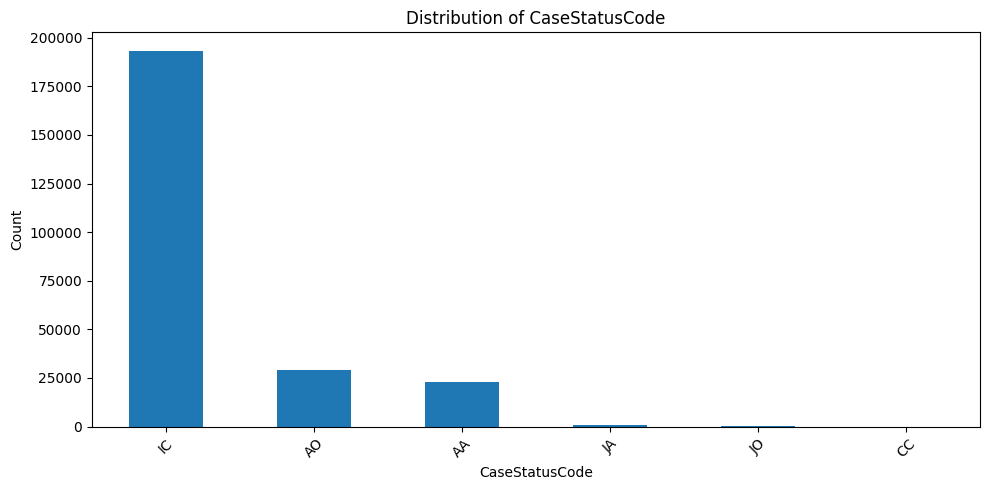

In [35]:
# Value counts
counts = raw_data['CaseStatusCode'].value_counts()

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of CaseStatusCode")
plt.xlabel("CaseStatusCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()